# Householder

In [7]:
import numpy as np
def factorQR(A):
    (m,n) = A.shape
    Q = np.eye(m)
    R = np.zeros_like(A)
    R[:,:] = A[:,:]
    for k in range(n):
        w = np.zeros([m,1])
        s = np.linalg.norm(R[k:,k],2)
        d = 1/np.sqrt(2*s*(s+np.abs(R[k,k])))
        if (R[k,k]<0): 
            s=-s
        w[k,0] = R[k,k] + s
        w[k+1:,0] = R[k+1:,k]    
        w = d*w
        H = np.eye(m) - 2*w@w.T
        R = H@R
        Q = H@Q
    Q = Q.T
    return (Q,R)

## Ejemplo

In [106]:
A = np.array([ [0, -4],[0,0],[-5,-2] ])
(Q,R) = factorQR(A)
## verificamos si A =QR
print(Q@R)

[[-2.22044605e-15 -4.00000000e+00]
 [-4.93038066e-31 -1.77635684e-15]
 [-5.00000000e+00 -2.00000000e+00]]


In [108]:
print(R)

[[-5.00000000e+00 -2.00000000e+00]
 [-1.11022302e-15 -4.00000000e+00]
 [-2.46519033e-31 -8.88178420e-16]]


## Ejemplo
Encuentre un polinomio de grado 3 que ajuste $y=f(x)$  

```
x  0  2  4  6  9  11  12  15  17  19
y  5  6  7  6  9   8   7  10  12  12
```
es decir $y = a + bx+cx^2+dx^3$

In [130]:
xdata=np.array([0,  2,  4 , 6,  9,  11,  12,  15 , 17,  19],dtype=float)
ydata=np.array([5,  6,  7,  6,  9,   8,   7,  10,  12,  12],dtype=float)
A = np.array([np.ones_like(x),x,x**2,x**3]).T
(Q,R) = factorQR(A)
print(A)

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]
 [1.000e+00 1.700e+01 2.890e+02 4.913e+03]
 [1.000e+00 1.900e+01 3.610e+02 6.859e+03]]


In [158]:
(m,n) = R.shape

def sustitucion_regresiva(R,c):
    # resuelve Rx=c
    (m,n) = R.shape
    x=np.zeros(n)
    x[n-1] = c[n-1]/R[n-1,n-1]
    for i in reversed(range(n-1)):
       x[i]= (c[i]-np.dot(x[i+1:n],R[i,i+1:n]) )/R[i,i]
    return x
        

In [160]:
# Resolvemos por minimos cuadrados R1* x = Q.T * ydata
c = Q.T @ ydata
R1 = R[0:n,0:n]
c = c[0:n]
xsol = sustitucion_regresiva(R1,c)
print(xsol)

[ 5.15844156e+00  4.24470705e-01 -3.04666370e-02  1.50844108e-03]


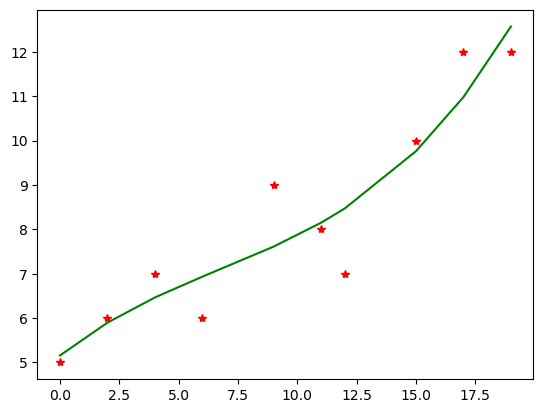

In [164]:
import matplotlib.pyplot as plt
plt.plot(xdata,ydata,'r*')
y_ajuste = A @ xsol
plt.plot(xdata,y_ajuste,'g')

In [148]:
print(R1)

[[-3.16227766e+00 -3.00416378e+01 -4.03822857e+02 -6.07884635e+03]
 [ 6.55716313e-16  1.93520025e+01  3.66447865e+02  6.47759838e+03]
 [-8.19017903e-16 -1.50200257e-16  1.03034276e+02  2.95645112e+03]
 [-7.91102372e-16 -4.39269444e-16  5.79558486e-16 -5.11488088e+02]]


In [150]:
print(c)

[-25.93067681   6.82099954   1.32052444  -0.77154964]


In [162]:
R1 @ xsol - c

array([-3.55271368e-15,  4.44089210e-15, -4.44089210e-15, -4.32986980e-15])